In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import style
style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
import statsmodels.graphics.gofplots as sm
import plotly.express as px

In [4]:
!pip install -U -q PyDrive
  
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
  
  
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [5]:
link = 'https://drive.google.com/file/d/1EiS6BH2Z6bUwSguZDP8A18ogu1_WD_TJ/view'
  
import pandas as pd
  
# to get the id part of the file
id = link.split("/")[-2]
  
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('pubg_data.csv')  
  
df = pd.read_csv('pubg_data.csv')
print(df)

         Unnamed: 0              Id  ... winPoints winPlacePerc
0           2093518  a3e3cea9f2e314  ...      1525       0.0667
1           3701672  43e4be7ad72cc7  ...      1516       0.5862
2           2059784  9a68690e31fdff  ...         0       0.8105
3           1302036  b147e1bd448fc4  ...      1515       0.5556
4            297180  d818b4edd59612  ...         0       0.6429
...             ...             ...  ...       ...          ...
1111737     4209703  43739241d6a8e8  ...         0       0.3929
1111738     4311549  d57c8a22a9e38b  ...         0       0.8542
1111739     3521011  c7ad131758ba55  ...         0       0.7174
1111740     2138826  8237d06ea2c508  ...         0       0.9000
1111741      609836  9beb0064c56445  ...      1611       1.0000

[1111742 rows x 30 columns]


In [6]:
df.columns

Index(['Unnamed: 0', 'Id', 'groupId', 'matchId', 'assists', 'boosts',
       'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace',
       'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
       'matchType', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'],
      dtype='object')

In [7]:

df.head()  #checking head of the dataset.

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,84,1437,0,0,0.000,1403,squad-fpp,31,29,-1,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,57,1225,0,0,0.000,1971,squad-fpp,30,30,-1,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,50,0,0,0,0.000,1741,solo-fpp,96,89,1516,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,56,1286,0,0,0.000,1738,squad-fpp,28,27,-1,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,31,0,1,1,7.737,2193,solo,99,95,1482,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429


In [8]:
df.tail() #checking tail of the dataset.

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
1111737,4209703,43739241d6a8e8,afb7c87045825e,ad5719d2422207,0,0,70.31,0,0,0,68,0,0,0,0.000,1390,squad-fpp,29,29,1472,0,0.0,0,0.000,0,0,799.80,2,0,0.3929
1111738,4311549,d57c8a22a9e38b,85e0624ddd2cb0,c3f50eef6dbb01,0,3,334.10,0,0,1,10,0,2,1,179.600,2030,solo-fpp,97,92,1508,0,1549.0,0,0.000,0,0,2777.00,7,0,0.8542
1111739,3521011,c7ad131758ba55,b3759687b385b3,990a8d68ec2bc4,0,0,119.30,1,0,0,25,0,1,1,2.804,1909,duo,47,47,1494,0,0.0,0,0.000,0,0,60.45,1,0,0.7174
1111740,2138826,8237d06ea2c508,13a05023ab7735,f93b1f0defaee5,1,4,53.51,1,0,7,45,0,0,0,0.000,1299,squad-fpp,31,30,1627,1,3610.0,0,0.000,1,0,2209.00,4,0,0.9000
1111741,609836,9beb0064c56445,5cfa1834dc5b11,0406ce4ab7a1bd,5,3,607.40,3,0,3,15,1691,2,2,52.520,1370,squad-fpp,27,26,-1,0,713.9,0,8.912,0,0,3713.00,5,1611,1.0000


In [9]:

df.info() #checking the information of the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111742 entries, 0 to 1111741
Data columns (total 30 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1111742 non-null  int64  
 1   Id               1111742 non-null  object 
 2   groupId          1111742 non-null  object 
 3   matchId          1111742 non-null  object 
 4   assists          1111742 non-null  int64  
 5   boosts           1111742 non-null  int64  
 6   damageDealt      1111742 non-null  float64
 7   DBNOs            1111742 non-null  int64  
 8   headshotKills    1111742 non-null  int64  
 9   heals            1111742 non-null  int64  
 10  killPlace        1111742 non-null  int64  
 11  killPoints       1111742 non-null  int64  
 12  kills            1111742 non-null  int64  
 13  killStreaks      1111742 non-null  int64  
 14  longestKill      1111742 non-null  float64
 15  matchDuration    1111742 non-null  int64  
 16  matchType        1

In [10]:
df.isna().sum() #checking for the missing values found one, in winPlacePerc we have a missing value.
#lets analyze why do we have a single missing value.

Unnamed: 0         0
Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [11]:

df.describe()

,Unnamed: 0,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111741e+06
mean,2.224362e+06,2.336738e-01,1.106655e+00,1.307364e+02,6.573612e-01,2.266488e-01,1.370348e+00,4.759562e+01,5.044301e+02,9.255097e-01,5.448503e-01,2.299814e+01,1.579348e+03,4.450584e+01,4.300693e+01,8.927902e+02,1.641784e-01,6.042142e+02,3.551184e-03,4.545068e+00,2.401097e-02,7.833652e-03,1.153282e+03,3.659685e+00,6.057065e+02,4.727868e-01
std,1.283879e+06,5.894028e-01,1.716050e+00,1.711755e+02,1.146023e+00,6.033356e-01,2.683819e+00,2.747025e+01,6.274006e+02,1.562216e+00,7.129032e-01,5.106977e+01,2.589348e+02,2.381989e+01,2.327841e+01,7.366443e+02,4.704189e-01,1.495949e+03,7.385452e-02,3.061857e+01,1.678909e-01,9.194621e-02,1.182788e+03,2.461805e+00,7.395140e+02,3.073771e-01
min,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.112440e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.367000e+03,2.800000e+01,2.700000e+01,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.552000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,2.223772e+06,0.000000e+00,0.000000e+00,8.411000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.438000e+03,3.000000e+01,3.000000e+01,1.444000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.841000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,3.337954e+06,0.000000e+00,2.000000e+00,1.859000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.171000e+03,1.000000e+00,1.000000e+00,2.133000e+01,1.851000e+03,4.900000e+01,4.700000e+01,1.500000e+03,0.000000e+00,7.927500e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.975000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,4.446964e+06,1.700000e+01,2.400000e+01,5.990000e+03,3.500000e+01,6.400000e+01,7.300000e+01,1.000000e+02,2.170000e+03,7.200000e+01,2.000000e+01,1.040000e+03,2.237000e+03,1.000000e+02,1.000000e+02,5.910000e+03,2.300000e+01,3.540000e+04,1.400000e+01,2.668000e+03,1.000000e+01,5.000000e+00,1.396000e+04,1.770000e+02,2.002000e+03,1.000000e+00


In [12]:

df.shape #This is a big dataset indeed.

(1111742, 30)

In [13]:
# Check row with NaN value
df[df['winPlacePerc'].isna()]

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
184895,2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,0,0,0,0.0,9,solo-fpp,1,1,1574,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [14]:
df.shape #checking the shape before dropping NAN value.

(1111742, 30)

In [15]:

df.dropna(axis=0,inplace=True)

In [16]:
df.shape #since we have only 1 nan value we used this method and dropped that row as we can see the row has been dropped now we can proceed for further investigation.

(1111741, 30)

In [17]:
#defining a function to plot multiple graphs,

In [18]:
def Sample(df,n):
    
    df_1= sorted(np.random.permutation(len(df))[:n])
    return df.iloc[df_1.copy()]

In [19]:
df_new = Sample(df,50000) #we considered 50,000 random rows from the dataset.

In [20]:
df_new

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
5,2862125,e705cb7a4446ea,9d7180a567d020,b146588581df18,0,0,0.00,0,0,0,59,0,0,0,0.00,1358,solo-fpp,94,90,1503,0,0.0,0,0.0,0,0,446.00,3,0,0.4946
9,271498,3cf3cc81325a37,537c4bd393dcff,38a8b94623d77d,2,1,230.80,2,0,1,8,0,3,2,174.50,1373,squad-fpp,32,30,1449,0,0.0,0,0.0,0,0,3781.00,5,0,0.8387
56,1341405,02be01fc3da450,352e581e49b36e,27350a4f93412c,0,0,0.00,0,0,0,91,1315,0,0,0.00,1411,duo-fpp,50,49,-1,0,0.0,0,0.0,0,0,9.48,1,1434,0.0408
75,1165244,f5c09d4f05321d,b35e7106540449,03ac9b981ab922,0,2,41.20,1,1,0,44,0,1,1,11.05,1955,duo-fpp,50,46,1473,0,0.0,0,0.0,0,0,720.40,5,0,0.3878
89,689622,bd4d0666fd4fa5,1279de745fe6ae,6adf78d1b19fea,0,3,157.40,0,0,2,19,1244,2,2,47.01,1469,squad-fpp,28,26,-1,0,0.0,0,110.0,0,0,2368.00,4,1501,0.8148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111658,103851,bba42daaddd1e2,66a34a9314924f,64f6fd6e516b45,0,1,300.00,0,1,1,8,0,3,1,105.20,1382,solo-fpp,92,89,1479,0,0.0,0,0.0,0,0,1592.00,5,0,0.8791
1111677,876306,e0c8b49f25c0f4,b32b207502d8c5,04276c44f8640b,0,0,100.00,0,0,0,23,1407,1,1,34.08,1417,solo-fpp,95,95,-1,0,0.0,0,0.0,0,0,1118.00,4,1671,0.9255
1111693,3918181,25e1885fd125b7,0066f7404ee293,9c62947fc3665a,0,0,60.63,0,0,0,75,0,0,0,0.00,1346,squad-fpp,29,28,1648,1,0.0,0,0.0,0,0,565.90,2,0,0.3214
1111704,4274368,b5f641f12bbfee,97a06ea1456ec8,ce5853e81d8dd6,0,4,119.80,1,1,5,14,1558,2,1,30.92,1373,duo-fpp,46,45,-1,1,2016.0,0,0.0,0,0,1700.00,4,1582,0.7778


In [21]:

del df_new['Unnamed: 0']
del df_new['Id']
del df_new['groupId']

In [22]:
df_new

,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
5,b146588581df18,0,0,0.00,0,0,0,59,0,0,0,0.00,1358,solo-fpp,94,90,1503,0,0.0,0,0.0,0,0,446.00,3,0,0.4946
9,38a8b94623d77d,2,1,230.80,2,0,1,8,0,3,2,174.50,1373,squad-fpp,32,30,1449,0,0.0,0,0.0,0,0,3781.00,5,0,0.8387
56,27350a4f93412c,0,0,0.00,0,0,0,91,1315,0,0,0.00,1411,duo-fpp,50,49,-1,0,0.0,0,0.0,0,0,9.48,1,1434,0.0408
75,03ac9b981ab922,0,2,41.20,1,1,0,44,0,1,1,11.05,1955,duo-fpp,50,46,1473,0,0.0,0,0.0,0,0,720.40,5,0,0.3878
89,6adf78d1b19fea,0,3,157.40,0,0,2,19,1244,2,2,47.01,1469,squad-fpp,28,26,-1,0,0.0,0,110.0,0,0,2368.00,4,1501,0.8148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111658,64f6fd6e516b45,0,1,300.00,0,1,1,8,0,3,1,105.20,1382,solo-fpp,92,89,1479,0,0.0,0,0.0,0,0,1592.00,5,0,0.8791
1111677,04276c44f8640b,0,0,100.00,0,0,0,23,1407,1,1,34.08,1417,solo-fpp,95,95,-1,0,0.0,0,0.0,0,0,1118.00,4,1671,0.9255
1111693,9c62947fc3665a,0,0,60.63,0,0,0,75,0,0,0,0.00,1346,squad-fpp,29,28,1648,1,0.0,0,0.0,0,0,565.90,2,0,0.3214
1111704,ce5853e81d8dd6,0,4,119.80,1,1,5,14,1558,2,1,30.92,1373,duo-fpp,46,45,-1,1,2016.0,0,0.0,0,0,1700.00,4,1582,0.7778


In [23]:
def plots(feature):
    plt.figure(figsize=(15,8))
    plt.subplot(1,2,1)
    sns.distplot(feature,kde = True)
    plt.subplot(1,2,2)
    sns.boxplot(feature)
    sm.ProbPlot(feature).qqplot(line = 's')

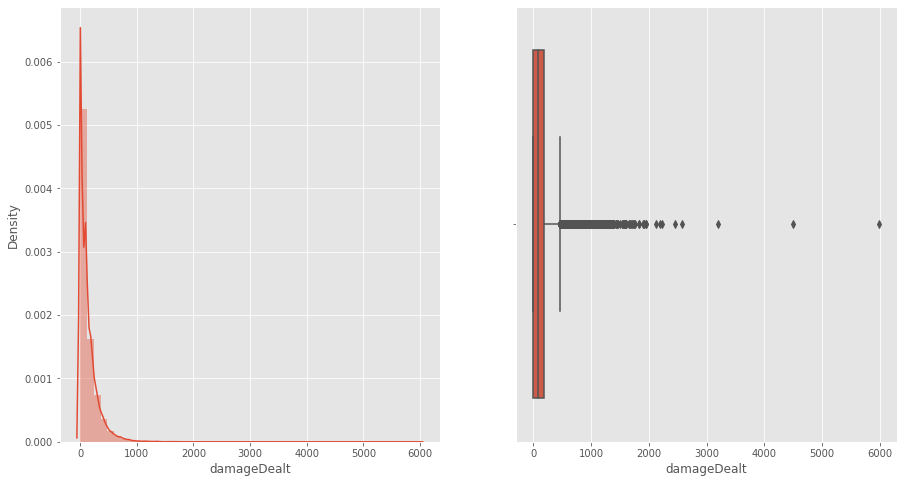

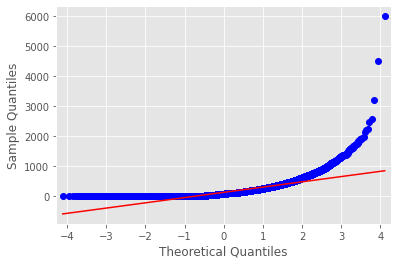

In [24]:

plots(df_new['damageDealt'])

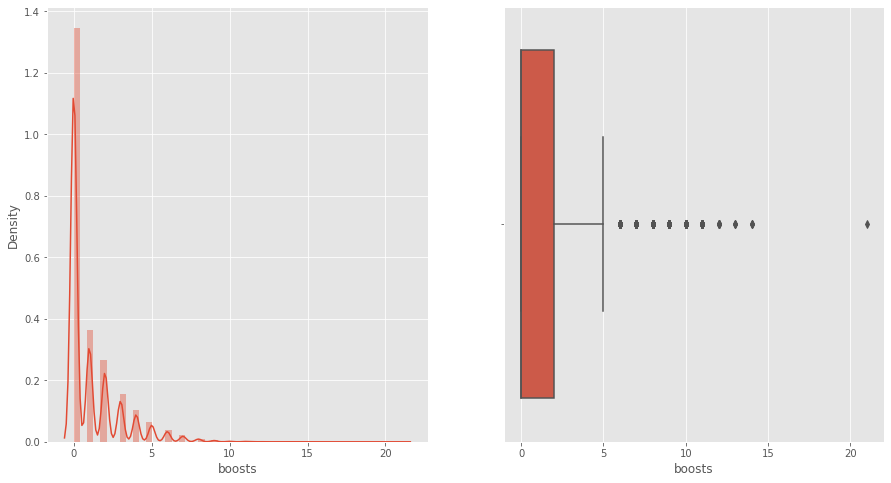

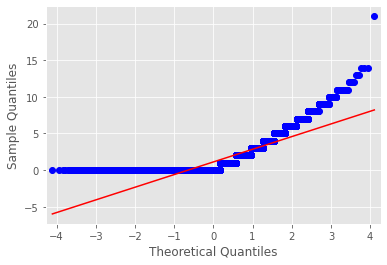

In [25]:

plots(df_new['boosts'])

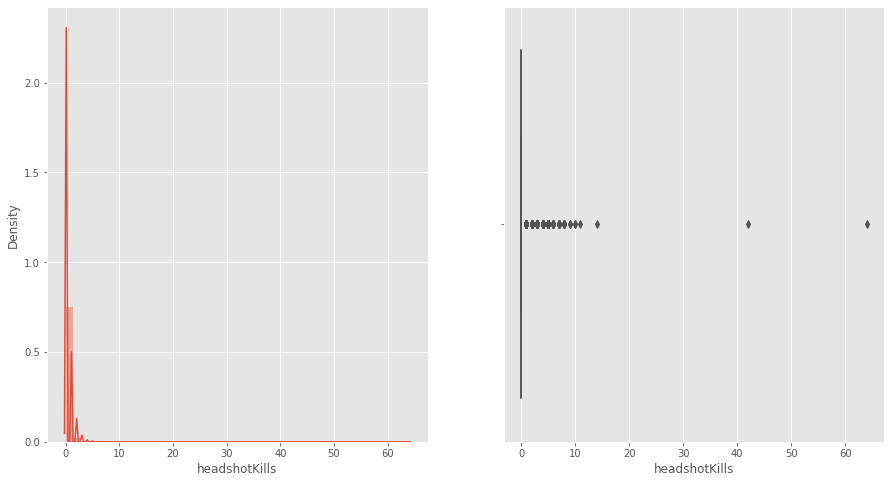

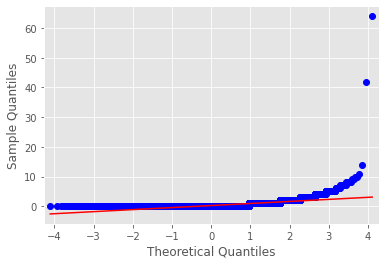

In [26]:

plots(df_new['headshotKills'])

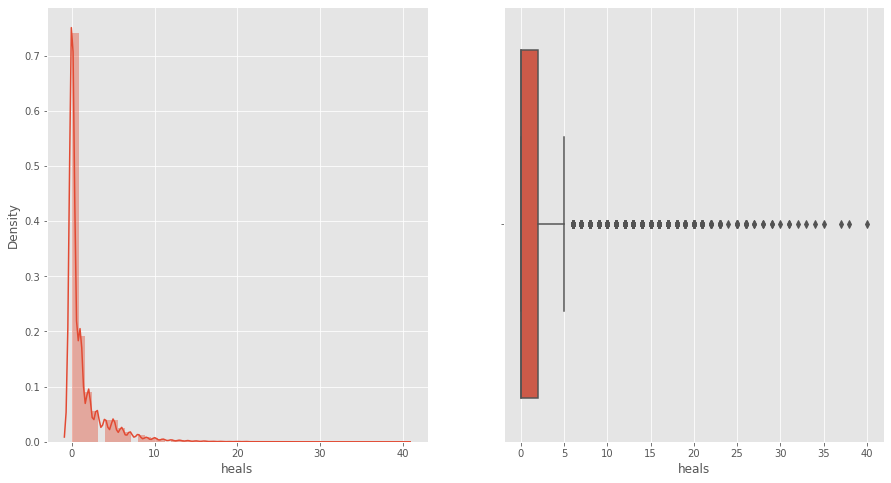

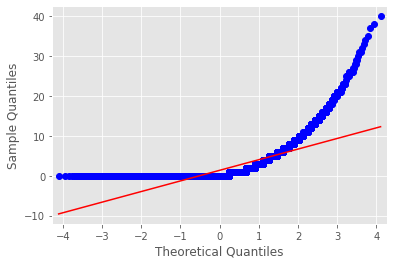

In [27]:

plots(df_new['heals'])

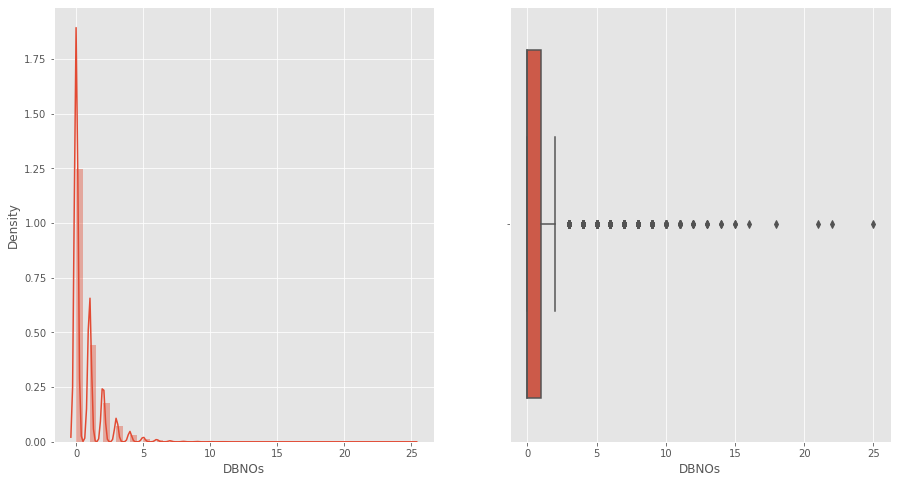

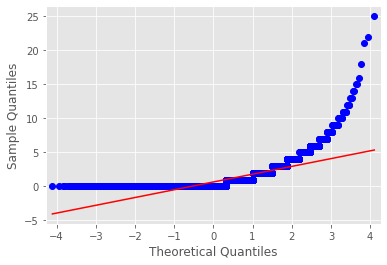

In [28]:

plots(df_new['DBNOs'])

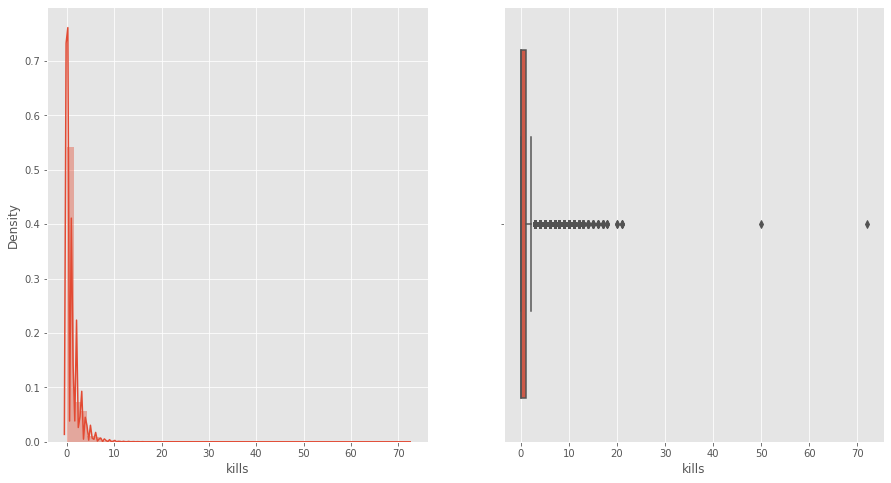

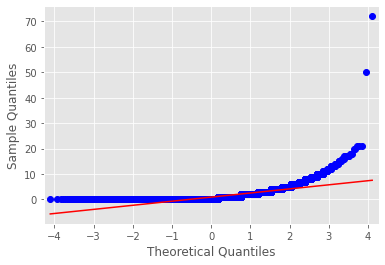

In [29]:

plots(df_new['kills'])

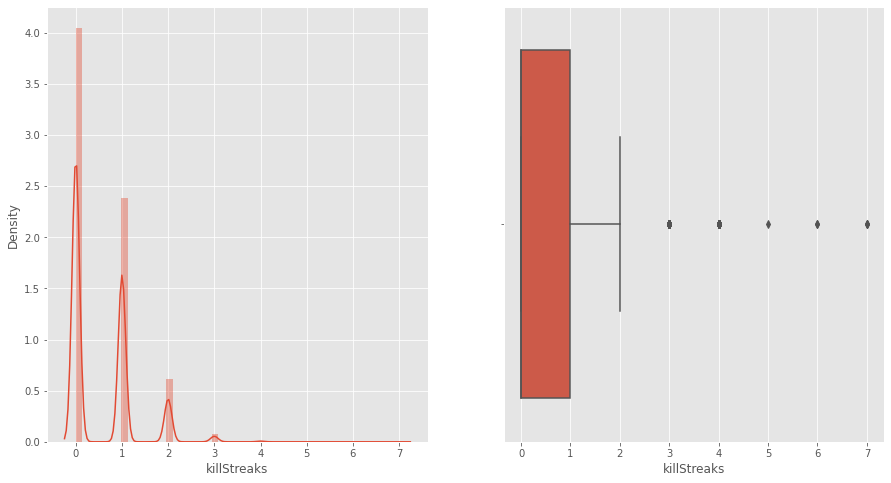

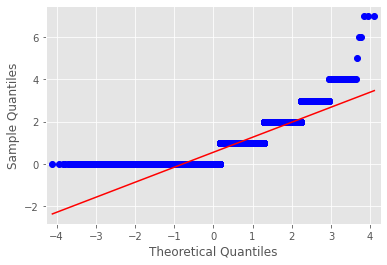

In [30]:
plots(df_new['killStreaks'])

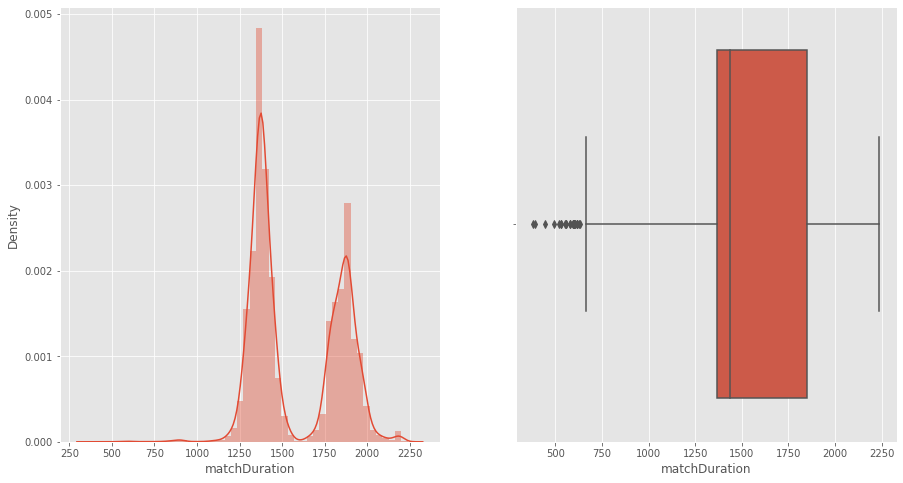

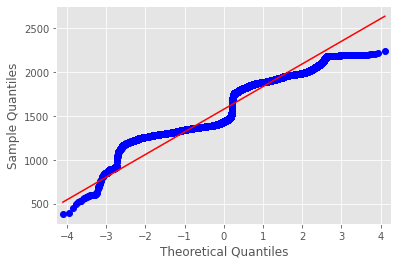

In [31]:

plots(df_new['matchDuration'])

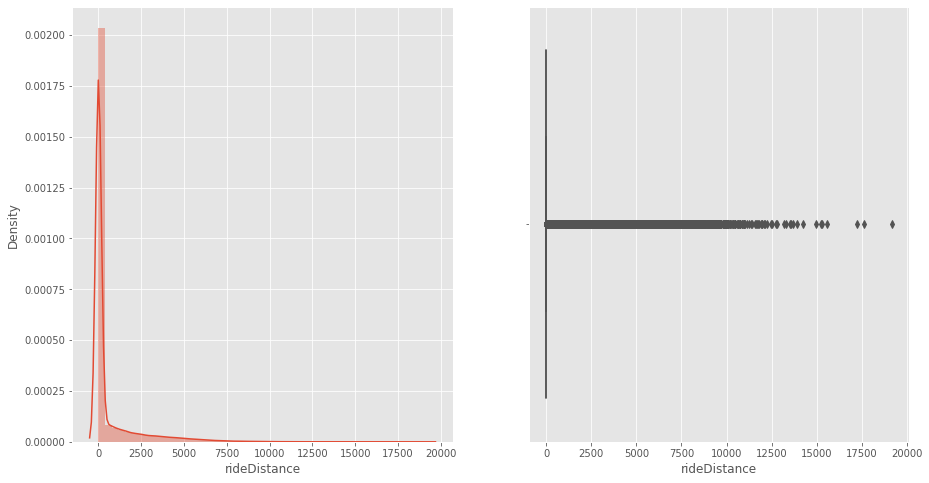

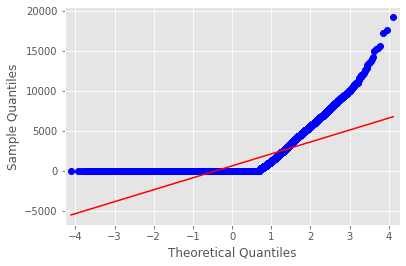

In [32]:
plots(df_new['rideDistance'])

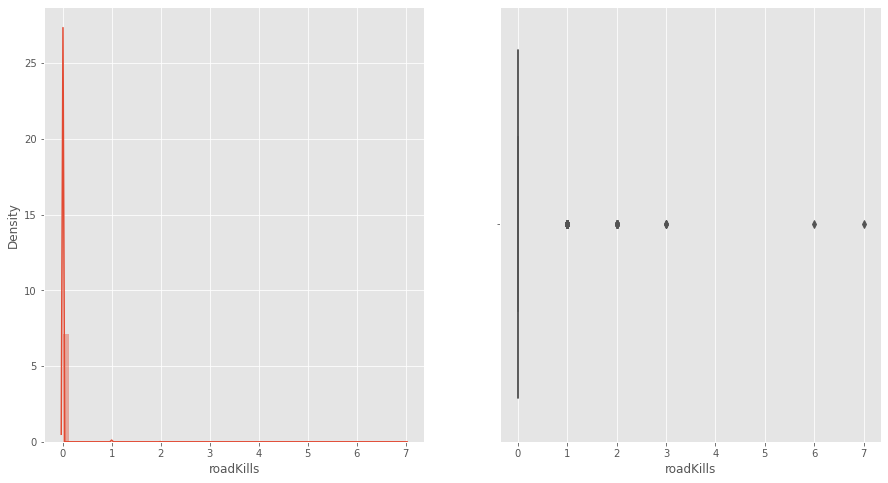

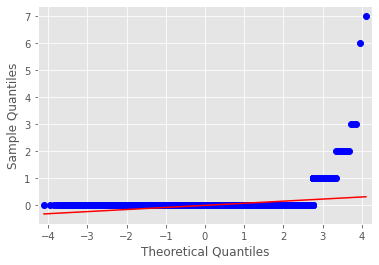

In [33]:

plots(df_new['roadKills'])

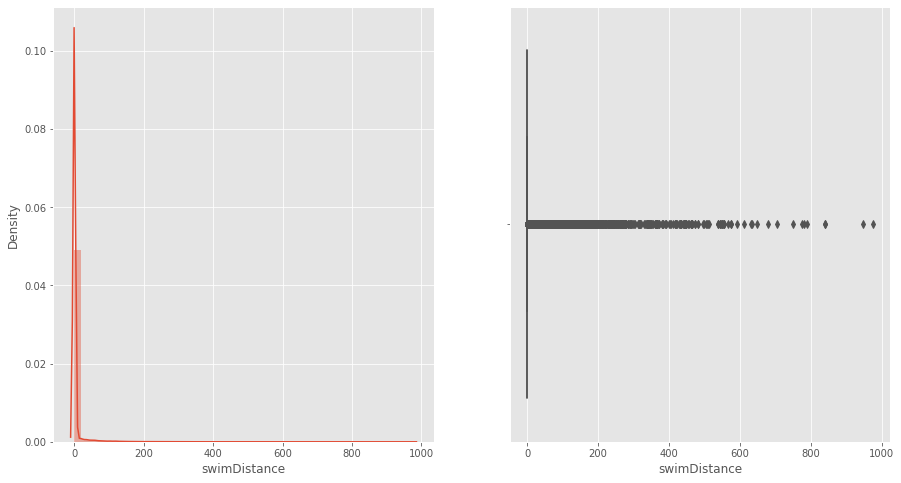

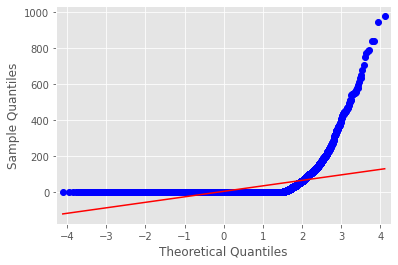

In [34]:
plots(df_new['swimDistance'])

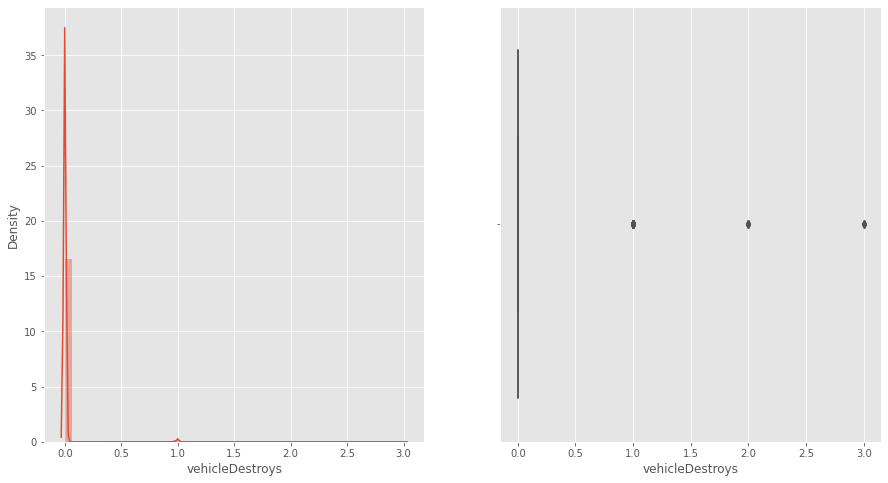

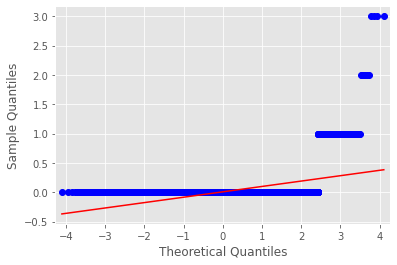

In [35]:
plots(df_new['vehicleDestroys'])

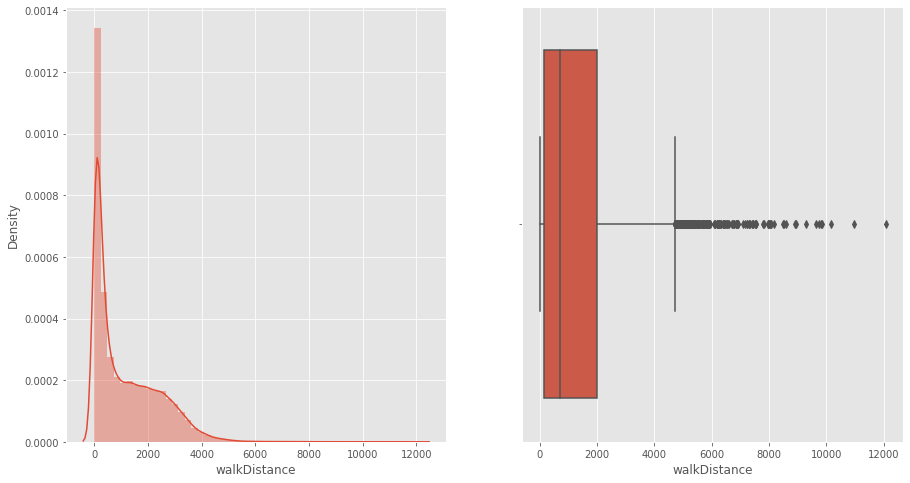

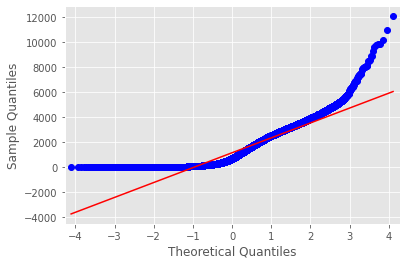

In [36]:

plots(df_new['walkDistance'])

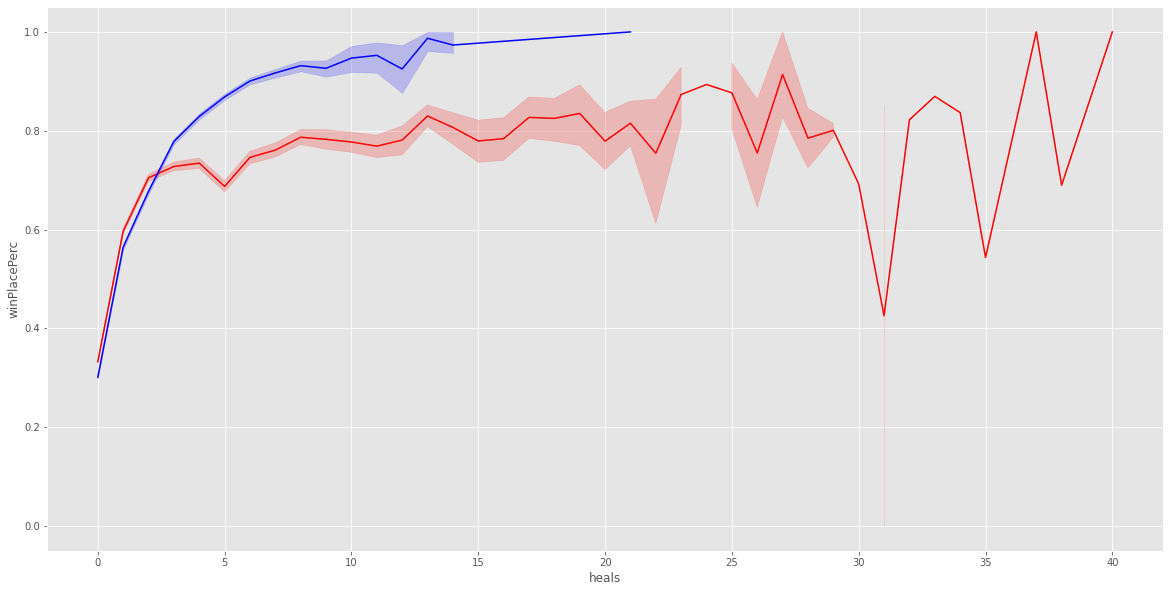

In [37]:
fig,ax1 = plt.subplots(figsize =(20,10))
sns.lineplot(x='heals',y='winPlacePerc',data=df_new,color='red')
sns.lineplot(x='boosts',y='winPlacePerc',data=df_new,color='blue')
plt.show()

In [38]:
solo_mode = df_new[df_new['numGroups']>50]
duo_mode = df_new[(df_new['numGroups']>25) & (df_new['numGroups']<=50)]
squad_mode = df_new[df_new['numGroups']<=25]

In [39]:
print('The no games played in solo mode are :',len(solo_mode))
print('The no games played in duo mode are :',len(duo_mode))
print('The no games played in squad mode are :',len(squad_mode))

The no games played in solo mode are : 8009
The no games played in duo mode are : 36917
The no games played in squad mode are : 5074


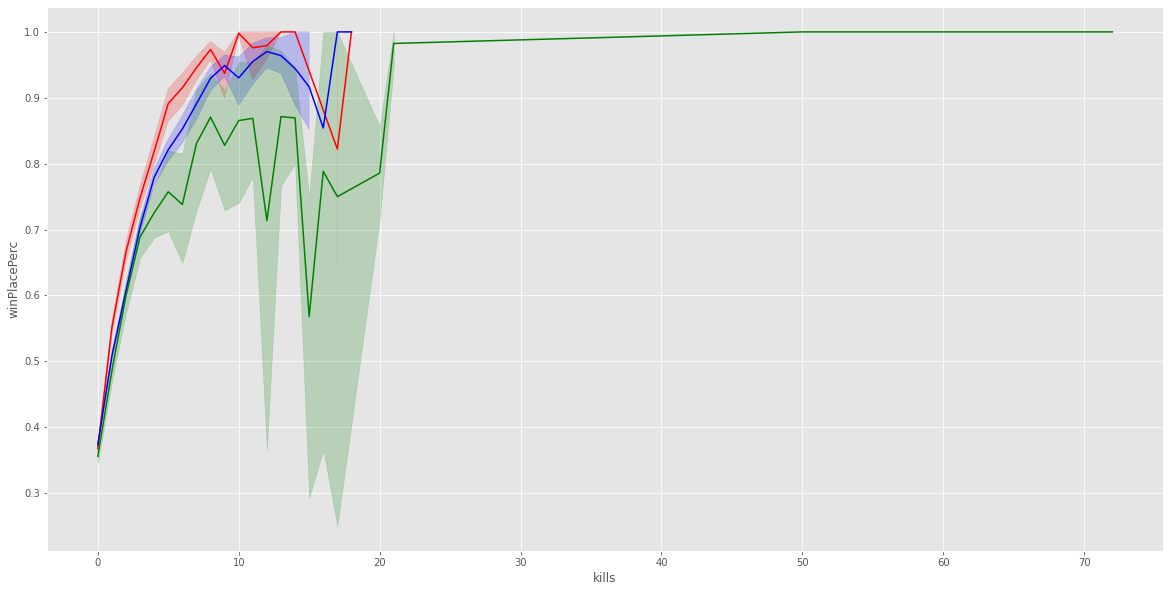

In [40]:
fig,ax1 = plt.subplots(figsize =(20,10))
sns.lineplot(x='kills',y='winPlacePerc',data=solo_mode,color='red')
sns.lineplot(x='kills',y='winPlacePerc',data=duo_mode,color='blue')
sns.lineplot(x='kills',y='winPlacePerc',data=squad_mode,color='green')
plt.show()

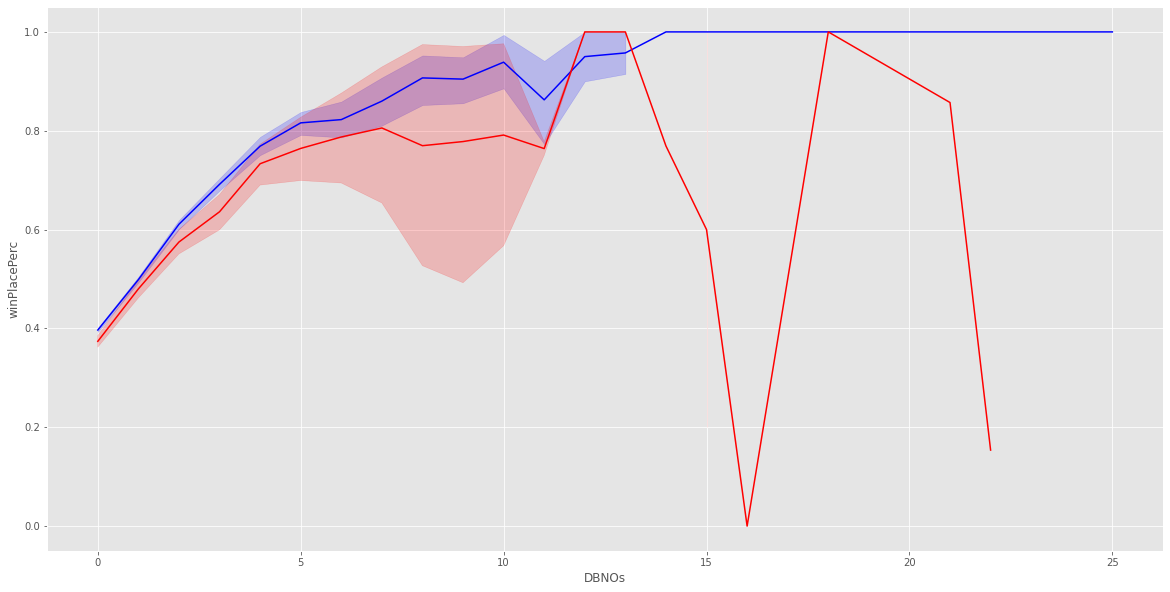

In [41]:
fig,ax1 = plt.subplots(figsize =(20,10))
sns.lineplot(x='DBNOs',y='winPlacePerc',data=duo_mode,color='blue')
sns.lineplot(x='DBNOs',y='winPlacePerc',data=squad_mode,color='red')

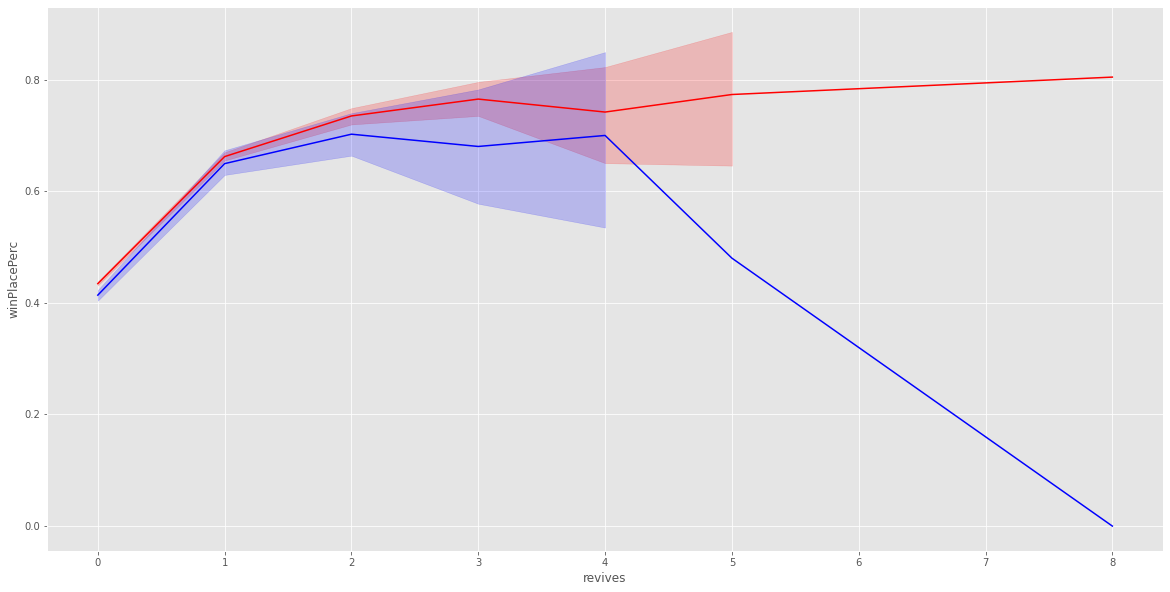

In [42]:
fig,ax1 = plt.subplots(figsize =(20,10))
sns.lineplot(x='revives',y='winPlacePerc',data=duo_mode,color='red')
sns.lineplot(x='revives',y='winPlacePerc',data=squad_mode,color='blue')
plt.show()

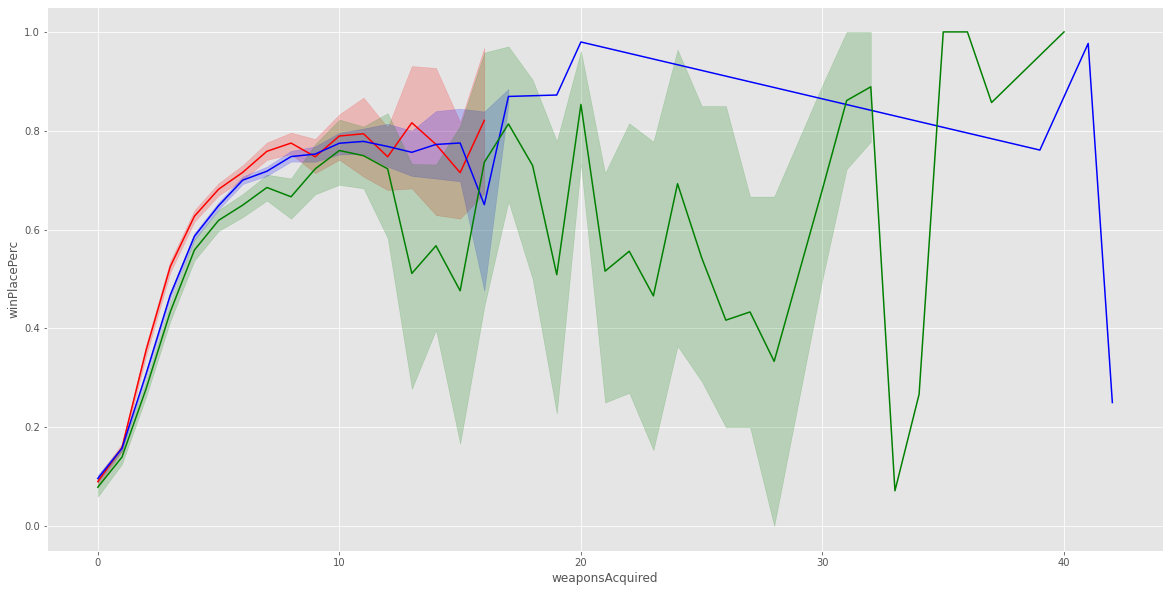

In [43]:
fig,ax1 = plt.subplots(figsize =(20,10))
sns.lineplot(x='weaponsAcquired',y='winPlacePerc',data=solo_mode,color='red')
sns.lineplot(x='weaponsAcquired',y='winPlacePerc',data=duo_mode,color='blue')
sns.lineplot(x='weaponsAcquired',y='winPlacePerc',data=squad_mode,color='green')
plt.show()

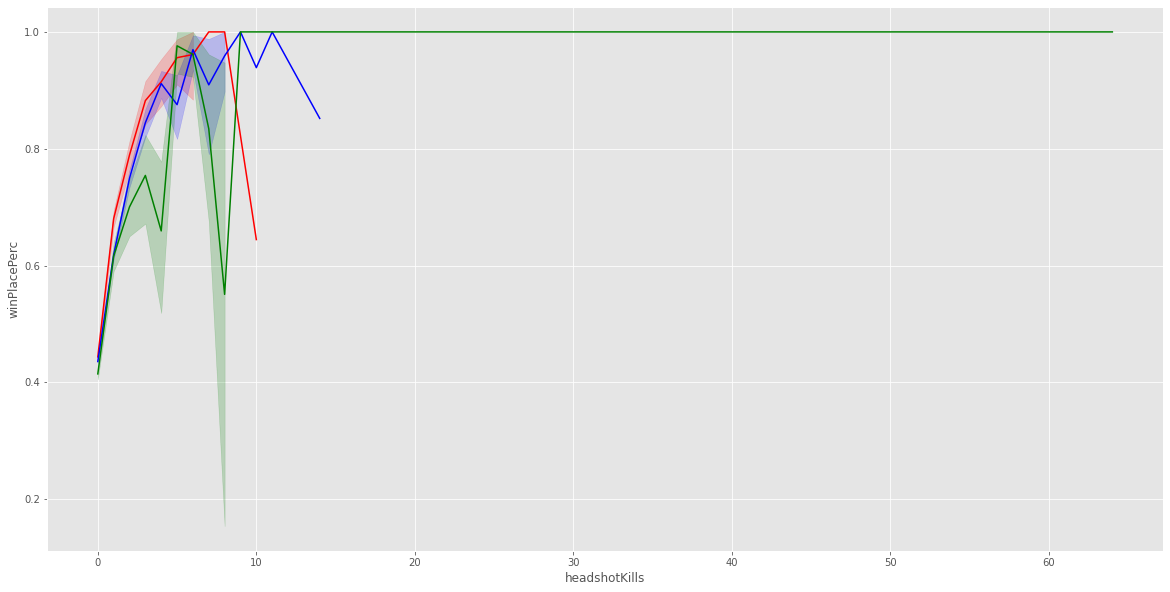

In [44]:
fig,ax1 = plt.subplots(figsize =(20,10))
sns.lineplot(x='headshotKills',y='winPlacePerc',data=solo_mode,color='red')
sns.lineplot(x='headshotKills',y='winPlacePerc',data=duo_mode,color='blue')
sns.lineplot(x='headshotKills',y='winPlacePerc',data=squad_mode,color='green')
plt.show()

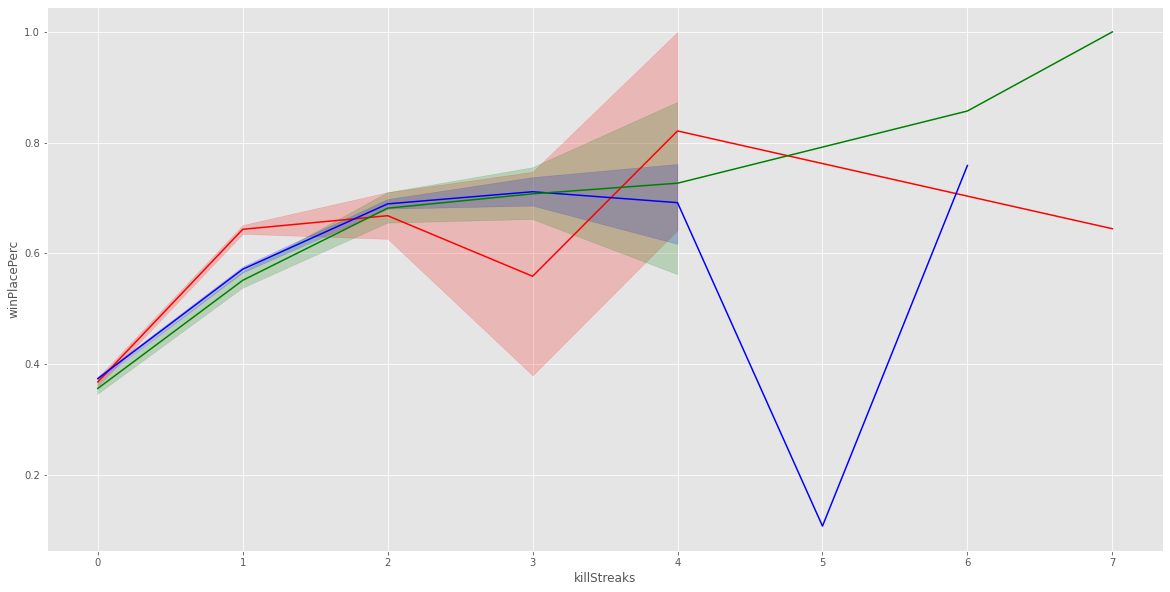

In [45]:
fig,ax1 = plt.subplots(figsize =(20,10))
sns.lineplot(x='killStreaks',y='winPlacePerc',data=solo_mode,color='red')
sns.lineplot(x='killStreaks',y='winPlacePerc',data=duo_mode,color='blue')
sns.lineplot(x='killStreaks',y='winPlacePerc',data=squad_mode,color='green')
plt.show()

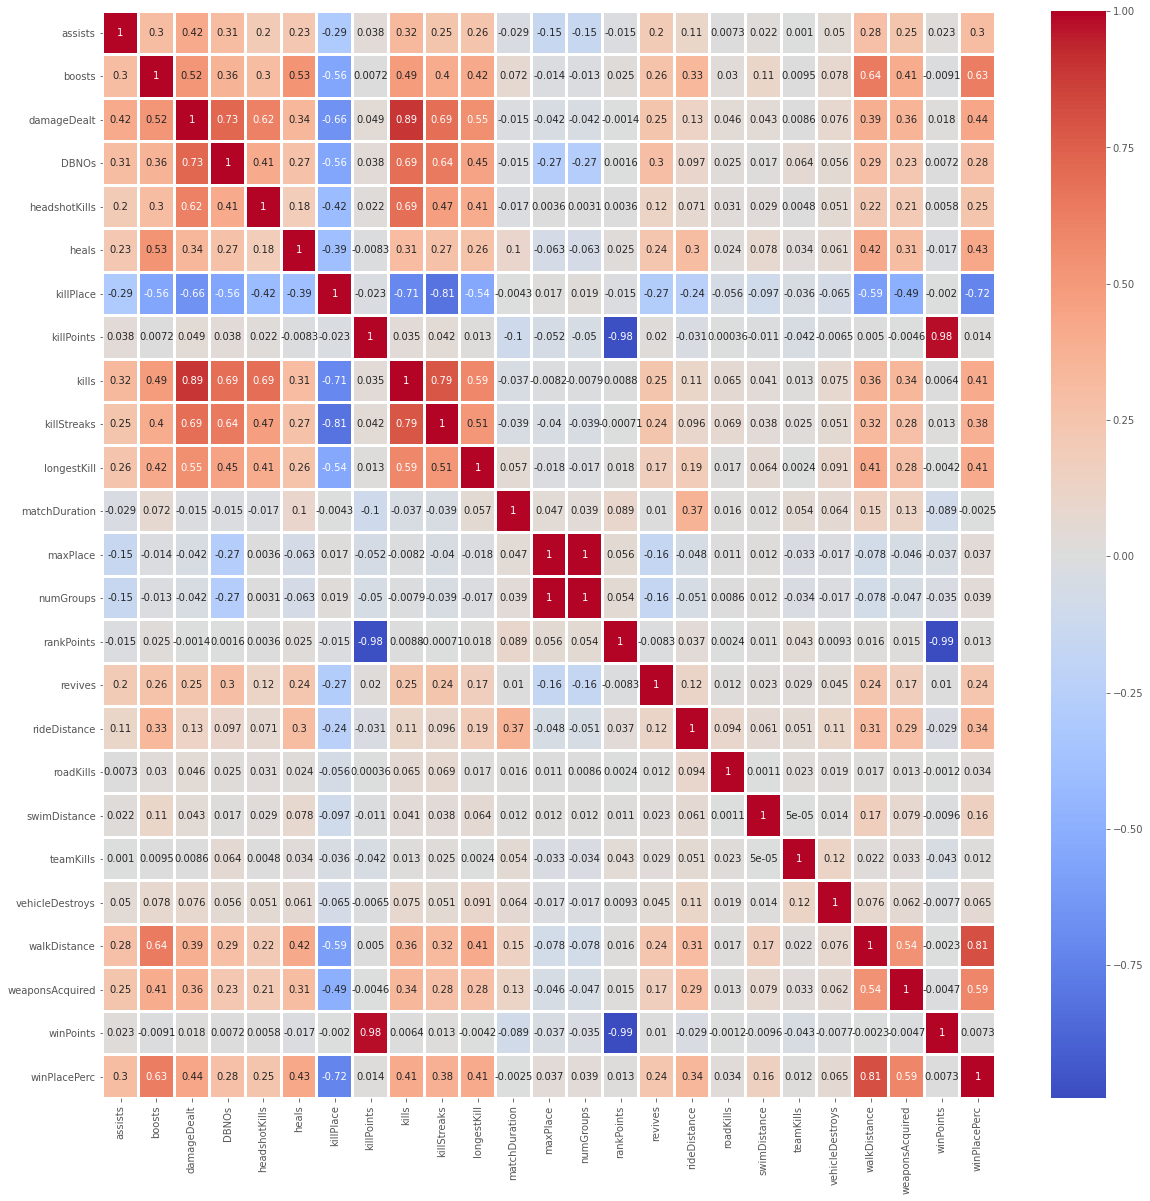

In [46]:
plt.figure(figsize=(20,20))
sns.heatmap(df_new.corr(), annot = True, cmap = "coolwarm",linewidths=2)

In [47]:

df_new.corr().sum()

assists            3.937528
boosts             6.349927
damageDealt        6.804252
DBNOs              5.156800
headshotKills      4.877693
heals              4.886630
killPlace         -6.509174
killPoints         0.960524
kills              6.723081
killStreaks        5.663297
longestKill        5.594742
matchDuration      1.858103
maxPlace           1.107494
numGroups          1.105233
rankPoints        -0.581607
revives            3.355583
rideDistance       3.828696
roadKills          1.508523
swimDistance       1.880826
teamKills          1.363230
vehicleDestroys    2.065395
walkDistance       5.936124
weaponsAcquired    4.981359
winPoints          0.789212
winPlacePerc       6.176187
dtype: float64

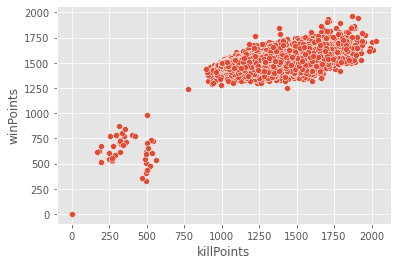

In [48]:

sns.scatterplot(df_new['killPoints'],df_new['winPoints'])

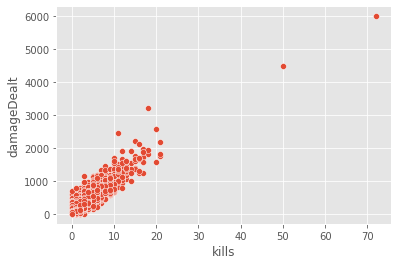

In [49]:
sns.scatterplot(df_new['kills'],df_new['damageDealt'])